In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
import idx2numpy

In [3]:
X_train = pd.read_csv("train.csv")

In [4]:
X_train.shape

(42000, 785)

In [5]:
X_test = pd.read_csv("test.csv")

In [6]:
X_test.shape

(28000, 784)

In [7]:
X_train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
y_train = X_train['label']

In [9]:
X_train.pop('label')

0        1
1        0
2        1
3        4
4        0
        ..
41995    0
41996    1
41997    7
41998    6
41999    9
Name: label, Length: 42000, dtype: int64

In [10]:
X_train = X_train.to_numpy()

In [11]:
y_train = y_train.to_numpy()[:,np.newaxis]

In [12]:
X_test = X_test.to_numpy()

In [13]:
y_test = np.zeros(X_test.shape[0])[:,np.newaxis]

## Dataset

In [14]:
X_train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [15]:
y_train

array([[1],
       [0],
       [1],
       ...,
       [7],
       [6],
       [9]], dtype=int64)

In [16]:
y_train_ohe = np.squeeze(np.eye(10)[y_train.reshape(-1)])

In [17]:
X_test

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [18]:
y_test

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]])

In [20]:
y_test_ohe = np.zeros((y_test.shape[0],10))

## Shapes

In [21]:
print("X_train: " , X_train.shape)
print("y_train: " , y_train.shape)
print("y_train_ohe" , y_train_ohe.shape)

print("X_test: " , X_test.shape)
print("y_test: " , y_test.shape)
print("y_test_ohe: " , y_test_ohe.shape)

X_train:  (42000, 784)
y_train:  (42000, 1)
y_train_ohe (42000, 10)
X_test:  (28000, 784)
y_test:  (28000, 1)
y_test_ohe:  (28000, 10)


## Model

In [53]:
def train_network(): 
    
    #------------------------------Preprocessing and initialising weights, biases-----------------------------------------#
    
    def initialize_parameters():
        np.random.seed(42)# comment this line to try different random initialisations for each runtime
        INIT_EPSILON = 0.5
        W1 = np.random.rand(20,784)*2*(INIT_EPSILON) - INIT_EPSILON; 
        b1 = np.random.rand(20,1)*2*(INIT_EPSILON) - INIT_EPSILON
    
        W2 = np.random.rand(15,20)*2*(INIT_EPSILON) - INIT_EPSILON
        b2 = np.random.rand(15,1)*2*(INIT_EPSILON) - INIT_EPSILON
    
        W3 = np.random.rand(10,15)*2*(INIT_EPSILON) - INIT_EPSILON
        b3 = np.random.rand(10,1)*2*(INIT_EPSILON) - INIT_EPSILON
        
        parameters = {"W1": W1,
                      "b1": b1,
                      "W2": W2,
                      "b2": b2,
                      "W3": W3,
                      "b3": b3}
        
        return parameters

    #-----------------------------------Defining functions for future use------------------------------------------------#
    
    def relu(x):
        return np.maximum(0,x)
    
    def softmax(z):
        ez = np.exp(z)
        sm = ez/np.sum(ez, axis = 0)
        return sm
    
    def relu_deriv(Z):
        return Z > 0
    
    def predictions(A3):
        return np.argmax(A3, axis = 0) 
    
    def accuracy(pred,y):
        return np.sum(pred==y)/y.size
    
    #------------------------------------------Forward propagation----------------------------------------------------------#
    
    def forward_prop(X, parameters):
        caches = []
        A = X.T/255
        layers = 4 
        for l in range(1, layers):
            A_prev = A
            W,b = parameters['W' + str(l)], parameters['b' + str(l)]
            Z = np.matmul(W,A_prev) + b
            cache_1 = (A_prev,W,b)
            cache_2 = (Z)
            cache = (cache_1,cache_2) 
            caches.append(cache)
            A = relu(Z)
        A_final = softmax(A)
        return A_final, caches
    
    #----------------------------------------------Cost Function-----------------------------------------------------------#
    
    def cost(Y_ohe, wt_lst, H, lbd):
        Y_ohe = Y_ohe.T #(42000,10) --> (10,42000)
        term1 = (- 1/42000) * np.sum(np.multiply(Y_ohe,np.log(H)) + np.multiply(1 - Y_ohe, np.log(1 - H)))
        sum = 0
        for w in wt_lst:
            sum = sum + np.sum(np.sum(np.square(w)))
        term2 = (lbd/(2*42000))*sum
        cost = term1 + term2
        return cost
    
    #-----------------------------------------------Back Propagation------------------------------------------------------#
    
    def backward_prop(y_train_ohe, A3, cache): 
        m = 42000
        A0 = cache[0][0][0] 
        W1 = cache[0][0][1]
        Z1 = cache[0][1]
        A1 = cache[1][0][0]
        W2 = cache[1][0][1]
        Z2 = cache[1][1]
        A2 = cache[2][0][0]
        W3 = cache[2][0][1]
        Z3 = cache[2][1]
        grads = []
        dZ3 = A3 - y_train_ohe.T
        dW3 = (1/m) * (dZ3@A2.T)
        db3 = (1/m) * (np.sum(dZ3))
        c3 = (dW3, db3)
        dZ2 = np.multiply((W3.T@dZ3), relu_deriv(Z2))
        dW2 = (1/m) * (dZ2@A1.T)
        db2 = (1/m) * (np.sum(dZ2))
        c2 = (dW2, db2)
        dZ1 = np.multiply((W2.T@dZ2), relu_deriv(Z1))
        dW1 = (1/m) * (dZ1@A0.T)
        db1 = (1/m) * (np.sum(dZ1))
        c1 = (dW1, db1)
        grads = [c1,c2,c3]
        return grads
    
    #---------------------------------------------------Updating Parameters-----------------------------------------------------#
    
    def update_params(cache, grads, alpha):
        W1 = cache[0][0][1]
        b1 = cache[0][0][2]
        W2 = cache[1][0][1]
        b2 = cache[1][0][2]
        W3 = cache[2][0][1]
        b3 = cache[2][0][2]
        dW1 = grads[0][0]
        db1 = grads[0][1]
        dW2 = grads[1][0]
        db2 = grads[1][1]
        dW3 = grads[2][0]
        db3 = grads[2][1]
        W1 = W1 - alpha*dW1
        b1 = b1 - alpha*db1
        W2 = W2 - alpha*dW2
        b2 = b2 - alpha*db2
        W3 = W3 - alpha*dW3
        b3 = b3 - alpha*db3
        return W1,b1,W2,b2,W3,b3
    
    #----------------------------------------------Gradient Descent-------------------------------------------------------------#
    
    def gradient_descent(X, y, alpha, lbd, epochs):
        upd = np.empty((epochs,1))
        params = initialize_parameters() #initialise params
        Wt_list = (params['W1'], params['W2'], params['W3'])
        prds = np.empty((10,42000))
        acc = 0
        for i in range(epochs):
            A3, che = forward_prop(X, params)
            upd[i] = cost(y, Wt_list, A3, lbd)
            grd = backward_prop(y_train_ohe, A3, che)
            W1,b1,W2,b2,W3,b3 = update_params(che, grd, alpha)
            params['W1'] = W1
            params['b1'] = b1
            params['W2'] = W2
            params['b2'] = b2
            params['W3'] = W3
            params['b3'] = b3
            prds = predictions(A3)
            acc = accuracy(prds,np.squeeze(y_train)) 
            if(i%50==0):
                print("Cost: ", np.round(upd[i], decimals = 4), "|| Accuracy: ", np.round(acc, decimals = 4)," for epoch ",(i+1)) #"
            if(i==epochs-1):
                print("Final Cost: ", np.round(upd[i], decimals = 4), "|| Final Accuracy: ", np.round(acc, decimals = 4)," for epoch ",(i+1))
        plt.figure(figsize=(10,6))
        plt.xlabel("Iterations")
        plt.ylabel("Cost")
        plt.plot(range(epochs),upd,'-', lw = 3)
        return prds, params, acc
    
    #-----------------------------------------------Runtime---------------------------------------------------------------#
    
    print("Training the network.....")
    pred_train, wb, acc_train = gradient_descent(X_train, y_train_ohe, 0.30, 0.0, 250)
    print("\n\nTraining Accuracy: ", acc_train*100,"%")
    m, n = X_train.shape

    fig, axes = plt.subplots(3,5, figsize=(10,10))
    fig.tight_layout(pad=0.13,rect=[0, 0.05, 1, 0.91]) 


    for i,ax in enumerate(axes.flat):
        random_index = np.random.randint(m)
        X_random_reshaped = X_train[random_index].reshape((28,28))
        ax.imshow(X_random_reshaped, cmap='gray')
        ax.set_title(y_train[random_index])
        ax.set_axis_off()
        fig.suptitle("Label, Image", fontsize=14)
    
    return pred_train, wb, acc_train

Training the network.....
Cost:  [3.6517] || Accuracy:  0.0959  for epoch  1
Cost:  [1.4339] || Accuracy:  0.689  for epoch  51
Cost:  [0.972] || Accuracy:  0.8049  for epoch  101
Cost:  [0.7595] || Accuracy:  0.855  for epoch  151
Cost:  [0.6613] || Accuracy:  0.8772  for epoch  201
Final Cost:  [0.6098] || Final Accuracy:  0.8884  for epoch  250


Training Accuracy:  88.83571428571429 %


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\text.py:1215: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


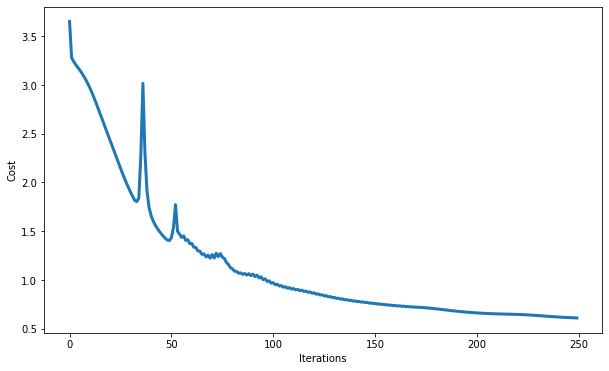

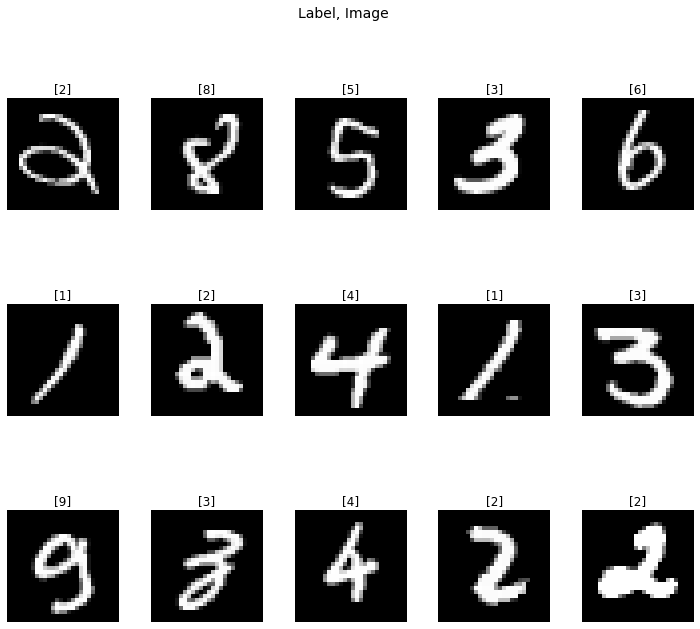

In [48]:
pred_train, wb, acc_train = train_network()

In [56]:
def predict_on_test(X_test, wb):
    
    def predictions(A3):
            return np.argmax(A3, axis = 0) 
    
    def relu(x):
        return np.maximum(0,x)
    
    def softmax(z):
        ez = np.exp(z)
        sm = ez/np.sum(ez, axis = 0)
        return sm
    
    def relu_deriv(Z):
        return Z > 0
    
    
    def accuracy(pred,y):
        return np.sum(pred==y)/y.size
    
    def forward_prop(X, parameters):
            caches = []
            A = X.T/255
            layers = 4 
            for l in range(1, layers):
                A_prev = A
                W,b = parameters['W' + str(l)], parameters['b' + str(l)]
                Z = np.matmul(W,A_prev) + b
                cache_1 = (A_prev,W,b)
                cache_2 = (Z)
                cache = (cache_1,cache_2) 
                caches.append(cache)
                A = relu(Z)
            A_final = softmax(A)
            return A_final, caches
    

    H, che = forward_prop(X_test, wb) #perform forward prop
    y_pred = predictions(H)
    return y_pred

In [57]:
pred_test = predict_on_test(X_test, wb)

In [58]:
pred_test

array([2, 0, 9, ..., 3, 9, 2], dtype=int64)

In [84]:
ImageId = np.arange(1,28001)

In [74]:
ImageId

array([     1,      2,      3, ..., 279998, 279999, 280000])

In [85]:
final = np.hstack((ImageId[:, np.newaxis], pred_test[:,np.newaxis]))

In [86]:
final

array([[    1,     2],
       [    2,     0],
       [    3,     9],
       ...,
       [27998,     3],
       [27999,     9],
       [28000,     2]], dtype=int64)

In [87]:
submission = pd.DataFrame(final, columns = ['ImageId','Label'])

In [94]:
submission.to_csv("C:/Users/asus/Desktop/ML Implementation/submit.csv", index = False)